4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
[9 0 0 ... 3 0 5]


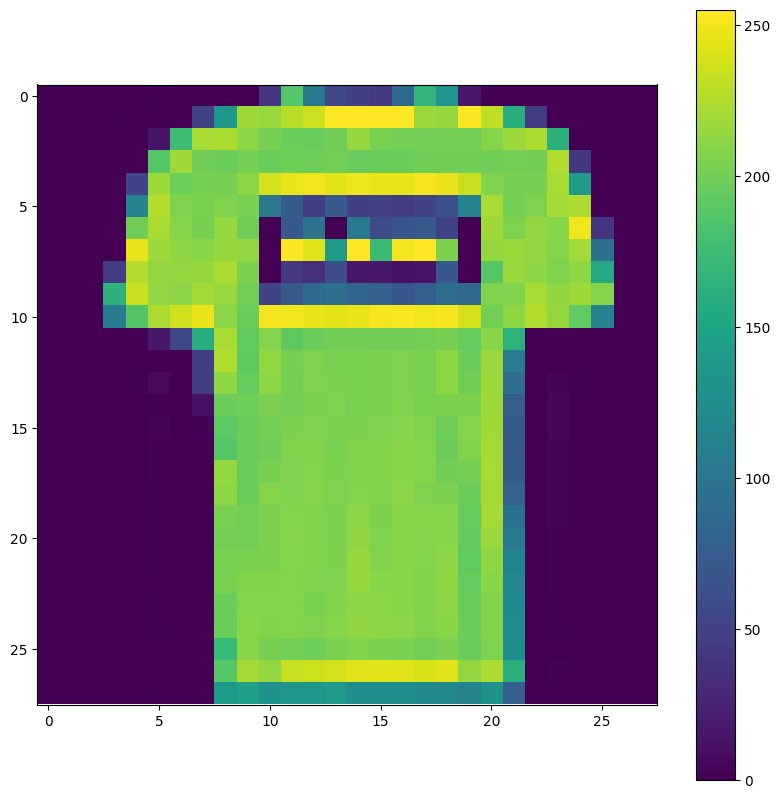

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# !pip install tensorflow

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)
print(train_labels)

class_names = ['T-shirt/top', 'Trouser','Pullovar','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
model = keras.Sequential([
 #2차원배열(28x28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
 keras.layers.Flatten(input_shape=(28,28)),
 #128개의 노드(뉴런)
 keras.layers.Dense(128, activation=tf.nn.relu),
 #10개의 노드의 소프트맥스층 (10개의 확률을 반환하고 반환된 값은 전체 합의 1이됨)
 #각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5790 - accuracy: 0.6752
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6993 - accuracy: 0.7403
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6403 - accuracy: 0.7612
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5902 - accuracy: 0.7789
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5804 - accuracy: 0.7928


In [ ]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 2s 5ms/step


array([2.1167247e-19, 0.0000000e+00, 8.9917472e-35, 0.0000000e+00,
       4.5931554e-32, 2.3922423e-02, 1.6823499e-25, 1.0695179e-02,
       4.5616568e-09, 9.6538246e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
np.argmax(predictions[100])

3

In [ ]:
test_labels[100]

3

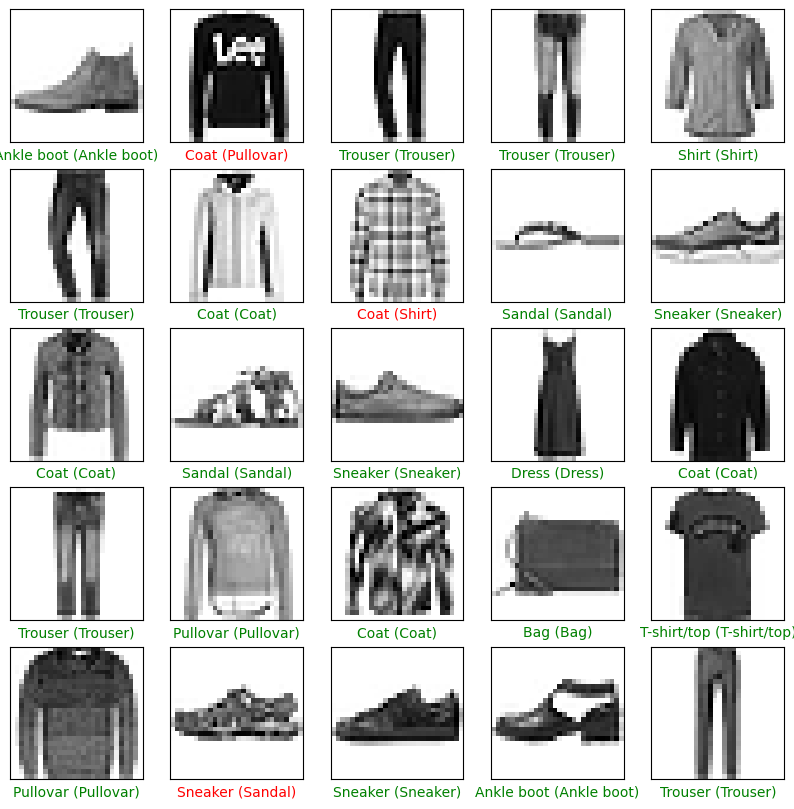

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid('off')
 plt.imshow(test_images[i], cmap=plt.cm.binary)
 # predictions에서 가장 큰 값을 predicted_label 로 가져온다.
 predicted_label = np.argmax(predictions[i])
 true_label = test_labels[i]
 # 이때 실제 test_label과 일치하면 초록색 글씨로,
 if predicted_label == true_label:
    color = 'green'
 # 일치하지 않으면 빨간색 글씨로 출력한다.
 else:
    color = 'red'
 plt.xlabel("{} ({})".format(class_names[predicted_label],
 class_names[true_label]),
 color=color)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
 predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(img, cmap=plt.cm.binary)
 predicted_label = np.argmax(predictions_array)
 if predicted_label == true_label:
    color = 'blue'
 else:
    color = 'red'
 plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
 100*np.max(predictions_array),
 class_names[true_label]),
 color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
 predictions_array, true_label = predictions_array[i], true_label[i]
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 thisplot = plt.bar(range(10), predictions_array, color="#777777")
 plt.ylim([0, 1])
 predicted_label = np.argmax(predictions_array)
 thisplot[predicted_label].set_color('red')
 thisplot[true_label].set_color('blue')

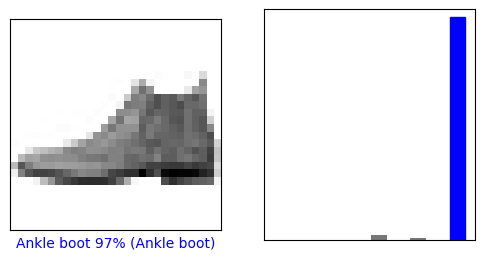

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

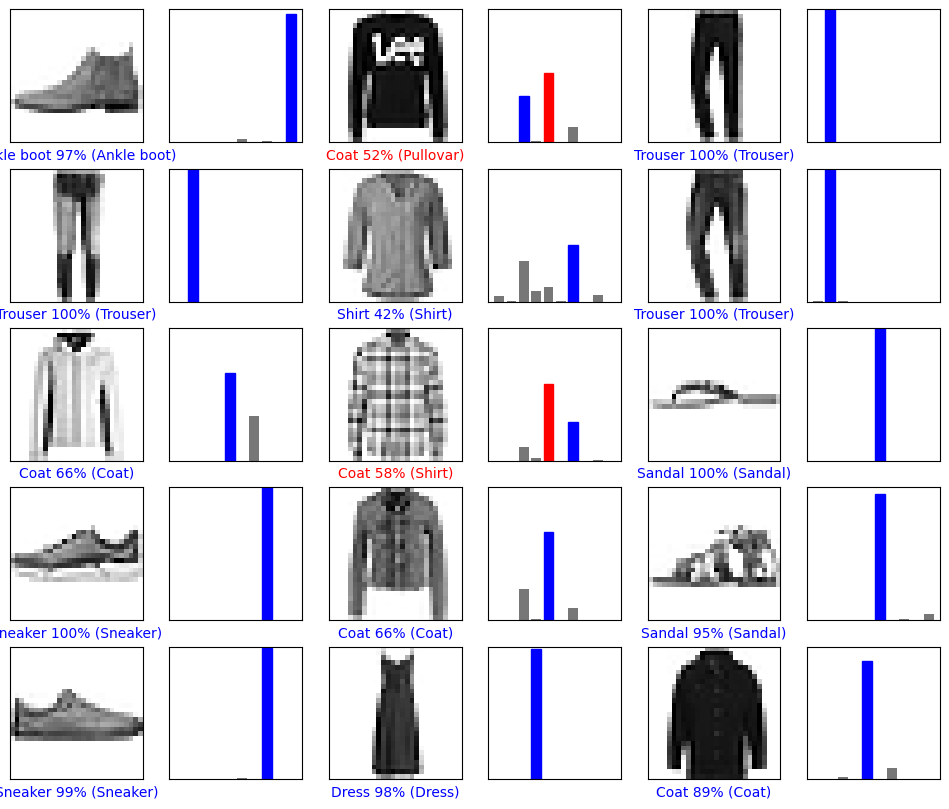

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions, test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[2.1167247e-19 0.0000000e+00 8.9918155e-35 0.0000000e+00 4.5931554e-32
  2.3922423e-02 1.6823563e-25 1.0695097e-02 4.5616564e-09 9.6538246e-01]]


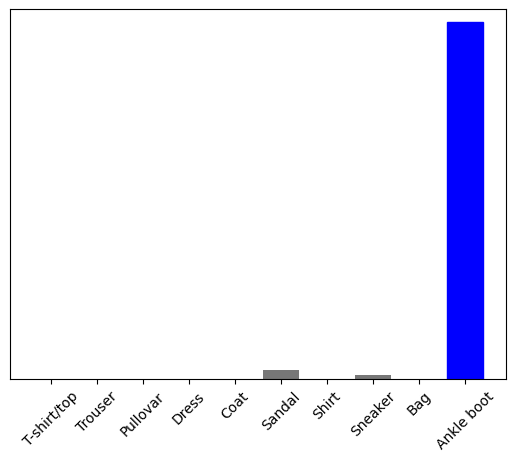

In [ ]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
from tensorflow import keras
from keras.datasets import cifar10
import numpy as np

#데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#데이터 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

#모델 생성
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='softmax'))

#모델 요약
model.summary()

#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

#모델 훈련
history = model.fit(x_train, y_train, epochs=5)

#모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print("loss=", loss)
print("accuracy=", accuracy)

#2개 테스트 이미지
test_batch = x_test[:2]

#모델 예측
preds = model.predict(test_batch)

#예측값 출력
print("preds=", preds)
print(np.argmax(preds[0]))
print(np.argmax(preds[1]))

170498071/170498071 [==============================] - 11s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                    

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

model = EfficientNetB0(include_top=False, weights='imagenet')

model = EfficientNetB0(weights='imagenet', drop_connect_rate=0.4)

16705208/16705208 [==============================] - 1s 0us/step
